In [1]:
#import libraries
import pandas as pd
import numpy as np
import sqlite3 as sql


In [2]:
#create database connection
database = "vorstudie.db"
connection = sql.connect(database)

In [3]:
query = '''SELECT * FROM review'''

In [4]:
newcurev_df = pd.read_sql_query(query, connection)
newcurev_df.head

<bound method NDFrame.head of        Label  Document   Topic  \
0          3         3    half   
1          3         3    flaw   
2          5         5   shirt   
3          2         6     one   
4          2         6   dress   
...      ...       ...     ...   
34336      5     23480   skirt   
34337      3     23484     top   
34338      3     23485     fit   
34339      3     23485  medium   
34340      5     23486   dress   

                                             Description  Textblob_Polarity  \
0      overall, the top half was comfortable and fit ...           0.157684   
1      imo, a major design flaw was the net over laye...           0.054167   
2      This shirt is very flattering to all due to th...           0.037500   
3      I love tracy reese dresses, but this one is no...           0.350000   
4      this dress was very pretty out of the package ...           0.325000   
...                                                  ...                ...   
34336  t

In [5]:
newcurev_df.head()

,Label,Document,Topic,Description,Textblob_Polarity,Textblob_Subjectivity,SIA_POS,SIA_Neu,SIA_Neg,SIA_Compound
0,3,3,half,"overall, the top half was comfortable and fit ...",0.157684,0.37316,0.248,0.752,0.0,0.6428
1,3,3,flaw,"imo, a major design flaw was the net over laye...",0.054167,0.30000,0.000,1.000,0.0,0.0000
2,5,5,shirt,This shirt is very flattering to all due to th...,0.037500,0.33750,0.178,0.822,0.0,0.3804
3,2,6,one,"I love tracy reese dresses, but this one is no...",0.350000,0.45000,0.167,0.833,0.0,0.3818
4,2,6,dress,this dress was very pretty out of the package ...,0.325000,1.00000,0.138,0.862,0.0,0.3064


In [6]:
newcurev_df['textblob_polarity'] = np.where(newcurev_df.Textblob_Polarity < -0.1, 
    'negative', 
    np.where(newcurev_df.Textblob_Polarity > 0.1, 'positive', 'neutral'))

newcurev_df.head()

,Label,Document,Topic,Description,Textblob_Polarity,Textblob_Subjectivity,SIA_POS,SIA_Neu,SIA_Neg,SIA_Compound,textblob_polarity
0,3,3,half,"overall, the top half was comfortable and fit ...",0.157684,0.37316,0.248,0.752,0.0,0.6428,positive
1,3,3,flaw,"imo, a major design flaw was the net over laye...",0.054167,0.30000,0.000,1.000,0.0,0.0000,neutral
2,5,5,shirt,This shirt is very flattering to all due to th...,0.037500,0.33750,0.178,0.822,0.0,0.3804,neutral
3,2,6,one,"I love tracy reese dresses, but this one is no...",0.350000,0.45000,0.167,0.833,0.0,0.3818,positive
4,2,6,dress,this dress was very pretty out of the package ...,0.325000,1.00000,0.138,0.862,0.0,0.3064,positive


In [7]:
newcurev_df['vader'] = np.where(newcurev_df.SIA_Compound < -0.1, 
    'negative', 
    np.where(newcurev_df.SIA_Compound > 0.1, 'positive', 'neutral'))

newcurev_df.head()

,Label,Document,Topic,Description,Textblob_Polarity,Textblob_Subjectivity,SIA_POS,SIA_Neu,SIA_Neg,SIA_Compound,textblob_polarity,vader
0,3,3,half,"overall, the top half was comfortable and fit ...",0.157684,0.37316,0.248,0.752,0.0,0.6428,positive,positive
1,3,3,flaw,"imo, a major design flaw was the net over laye...",0.054167,0.30000,0.000,1.000,0.0,0.0000,neutral,neutral
2,5,5,shirt,This shirt is very flattering to all due to th...,0.037500,0.33750,0.178,0.822,0.0,0.3804,neutral,positive
3,2,6,one,"I love tracy reese dresses, but this one is no...",0.350000,0.45000,0.167,0.833,0.0,0.3818,positive,positive
4,2,6,dress,this dress was very pretty out of the package ...,0.325000,1.00000,0.138,0.862,0.0,0.3064,positive,positive


In [8]:
newcurev_df['userrating'] = np.where(newcurev_df.Label < 3, 
    'negative', 
    np.where(newcurev_df.Label > 3, 'positive', 'neutral'))

newcurev_df.head()

,Label,Document,Topic,Description,Textblob_Polarity,Textblob_Subjectivity,SIA_POS,SIA_Neu,SIA_Neg,SIA_Compound,textblob_polarity,vader,userrating
0,3,3,half,"overall, the top half was comfortable and fit ...",0.157684,0.37316,0.248,0.752,0.0,0.6428,positive,positive,neutral
1,3,3,flaw,"imo, a major design flaw was the net over laye...",0.054167,0.30000,0.000,1.000,0.0,0.0000,neutral,neutral,neutral
2,5,5,shirt,This shirt is very flattering to all due to th...,0.037500,0.33750,0.178,0.822,0.0,0.3804,neutral,positive,positive
3,2,6,one,"I love tracy reese dresses, but this one is no...",0.350000,0.45000,0.167,0.833,0.0,0.3818,positive,positive,negative
4,2,6,dress,this dress was very pretty out of the package ...,0.325000,1.00000,0.138,0.862,0.0,0.3064,positive,positive,negative


In [9]:
#Anzahl Topics
topic_amount = newcurev_df["Topic"]
topic_amount.count()

34341

In [77]:
plotunique_topic = newcurev_df["Topic"].nunique()


In [78]:
topic_amount.value_counts()

dress       2719
fabric      1871
top         1538
color       1261
material    1234
            ... 
gem            1
practice       1
didn?t         1
fade           1
solution       1
Name: Topic, Length: 1967, dtype: int64

In [79]:
#Variables Creation for Plots
topic_user = newcurev_df["userrating"]
userpos = topic_user.value_counts()['positive']
userneg = topic_user.value_counts()['negative']
userneut = topic_user.value_counts()['neutral']

topic_vader = newcurev_df["vader"]
vaderpos = topic_vader.value_counts()['positive']
vaderneg = topic_vader.value_counts()['negative']
vaderneut = topic_vader.value_counts()['neutral']

topic_textblob = newcurev_df["textblob_polarity"]
textblobpos = topic_textblob.value_counts()['positive']
textblobneg = topic_textblob.value_counts()['negative']
textblobneut = topic_textblob.value_counts()['neutral']

In [80]:
topic_textblob.value_counts()

positive    20764
neutral     10215
negative     3362
Name: textblob_polarity, dtype: int64

In [81]:
topic_vader.value_counts()

positive    22083
neutral      8246
negative     4012
Name: vader, dtype: int64

In [82]:
topic_user.value_counts()

positive    25408
neutral      4914
negative     4019
Name: userrating, dtype: int64

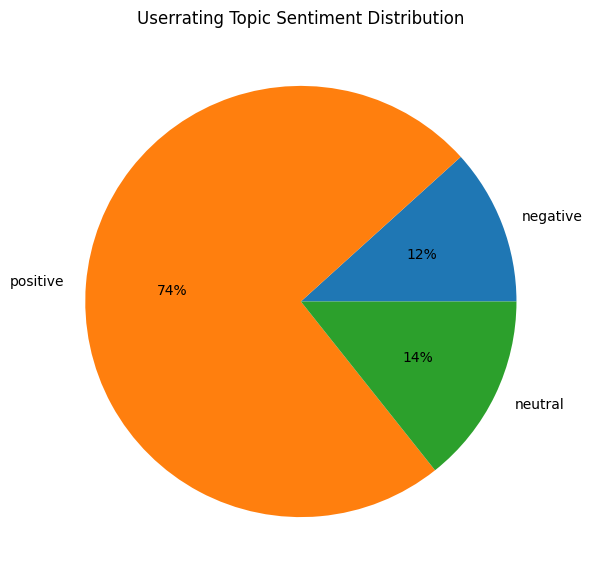

In [83]:
# Show Userrating Distribution
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
userrating_pieplot = ['negative', 'positive', 'neutral']
 
userpieplot_data = [userneg, userpos, userneut]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(userpieplot_data, labels = userrating_pieplot, autopct='%1.0f%%' )

#Title Plot
plt.title("Userrating Topic Sentiment Distribution")
 
# show plot
plt.show()

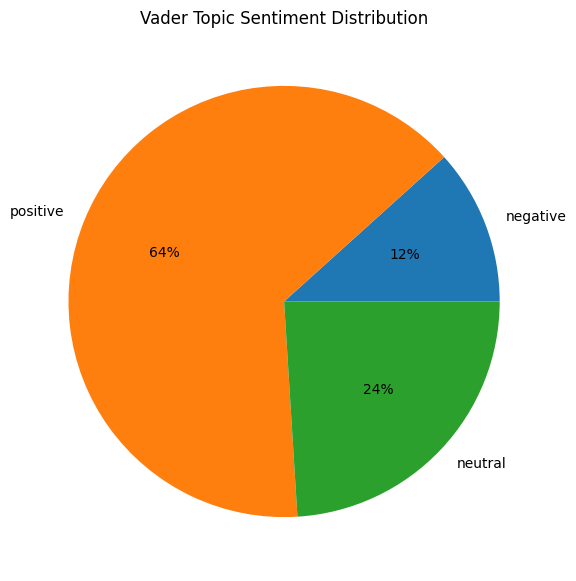

In [84]:
# Show Vaderrating Distribution
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
vaderrating_pieplot = ['negative', 'positive', 'neutral']
 
vaderpieplot_data = [vaderneg, vaderpos, vaderneut]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(vaderpieplot_data, labels = vaderrating_pieplot, autopct='%1.0f%%')

#Title Plot
plt.title("Vader Topic Sentiment Distribution") 
 
# show plot
plt.show()

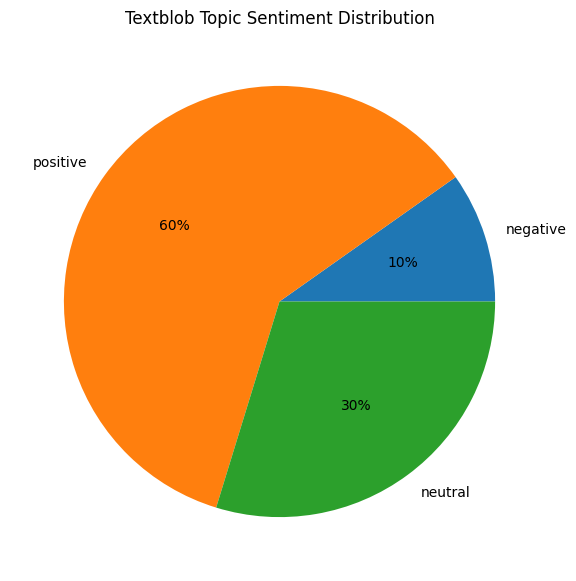

In [85]:
# Show Textblob Distribution
from matplotlib import pyplot as plt
import numpy as np
 
# Creating dataset
textblobrating_pieplot = ['negative', 'positive', 'neutral']
 
textblobpieplot_data = [textblobneg, textblobpos, textblobneut]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(textblobpieplot_data, labels = textblobrating_pieplot, autopct='%1.0f%%')
#Title Plot
plt.title("Textblob Topic Sentiment Distribution") 
# show plot
plt.show()

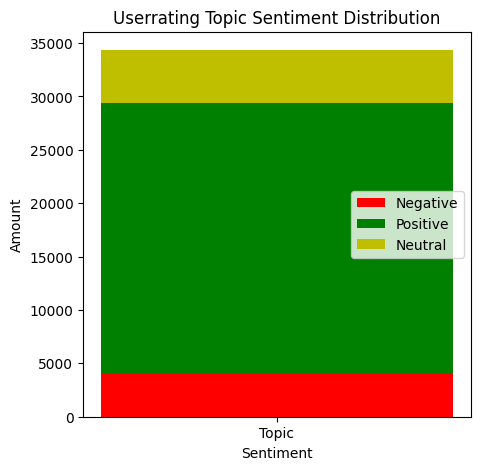

In [86]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5, 5) 
# create data
x = ["Topic"]
y1 = np.array(userneg)
y2 = np.array([userpos])
y3 = np.array([userneut])
# y4 = np.array([10, 29, 13, 19])
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='g')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Sentiment")
plt.ylabel("Amount")
plt.legend(["Negative", "Positive", "Neutral"])
plt.title("Userrating Topic Sentiment Distribution")
plt.show()

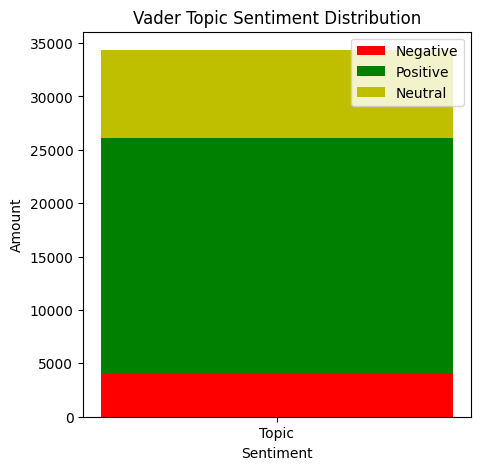

In [87]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5, 5) 
# create data
x = ["Topic"]
y1 = np.array(vaderneg)
y2 = np.array([vaderpos])
y3 = np.array([vaderneut])
# y4 = np.array([10, 29, 13, 19])
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='g')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Sentiment")
plt.ylabel("Amount")
plt.legend(["Negative", "Positive", "Neutral"])
plt.title("Vader Topic Sentiment Distribution")
plt.show()

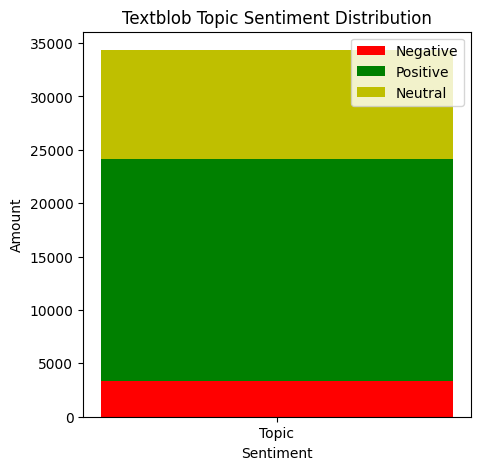

In [88]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5, 5) 
# create data
x = ["Topic"]
y1 = np.array(textblobneg)
y2 = np.array([textblobpos])
y3 = np.array([textblobneut])
# y4 = np.array([10, 29, 13, 19])
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='g')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Sentiment")
plt.ylabel("Amount")
plt.legend(["Negative", "Positive", "Neutral"])
plt.title("Textblob Topic Sentiment Distribution")
plt.show()

In [89]:
#Following Codes will show Topics per Description or per Document and further show the sentiment 
#AVG Sentiment


newcurev_df['AVG Sentiment'] = (newcurev_df['Textblob_Polarity'] + newcurev_df['SIA_Compound']) / 2
newcurev_df.head()

,Label,Document,Topic,Description,Textblob_Polarity,Textblob_Subjectivity,SIA_POS,SIA_Neu,SIA_Neg,SIA_Compound,textblob_polarity,vader,userrating,AVG Sentiment
0,3,3,half,"overall, the top half was comfortable and fit ...",0.157684,0.37316,0.248,0.752,0.0,0.6428,positive,positive,neutral,0.400242
1,3,3,flaw,"imo, a major design flaw was the net over laye...",0.054167,0.30000,0.000,1.000,0.0,0.0000,neutral,neutral,neutral,0.027083
2,5,5,shirt,This shirt is very flattering to all due to th...,0.037500,0.33750,0.178,0.822,0.0,0.3804,neutral,positive,positive,0.208950
3,2,6,one,"I love tracy reese dresses, but this one is no...",0.350000,0.45000,0.167,0.833,0.0,0.3818,positive,positive,negative,0.365900
4,2,6,dress,this dress was very pretty out of the package ...,0.325000,1.00000,0.138,0.862,0.0,0.3064,positive,positive,negative,0.315700


In [108]:
#Total Amount of Sentiments
avgamount = newcurev_df['AVG Sentiment']
avgamount.count()

34341

In [ ]:
topicquery = '''SELECT 
        Description,
        Document,
        (SIA_COMPOUND + Textblob_Polarity)/2 as sentiment,
        COUNT(Topic)
        
        
        FROM review
        
        GROUP BY
        Description'''


In [ ]:
description_df = pd.read_sql_query(topicquery, connection)
description_df.head()

,Description,Document,sentiment,COUNT(Topic)
0,"\n\nlooking at the pictures online, i thought ...",17681,0.000000,1
1,\r\n\r\nretailer accepted the return with a ha...,8159,0.529850,1
2,\r\n\r\nwanted to love this as the style is ve...,7871,0.014867,1
3,"\r\nas the reviewer say, it is very thick wool...",13044,0.200500,1
4,\r\nbought a similar maeve dress last year and...,3979,0.200633,1


In [ ]:
topicavgdescrquery = '''SELECT AVG(COUNT)
                FROM
                (SELECT COUNT (*) AS Count
                FROM review

                GROUP BY
                Description
                ) as counts'''

In [ ]:
descriptionavg_df = pd.read_sql_query(topicavgdescrquery, connection)
descriptionavg_df.head()

,AVG(COUNT)
0,1.012173


In [ ]:
topicavgdocquery = '''SELECT AVG(COUNT)
                FROM
                (SELECT COUNT (*) AS Count
                FROM review

                GROUP BY
                Document
                ) as counts'''

In [ ]:
documentavg_df = pd.read_sql_query(topicavgdocquery, connection)
documentavg_df.head()

,AVG(COUNT)
0,1.952747


In [ ]:
topicsentimentquery = '''SELECT 
        (SIA_COMPOUND + Textblob_Polarity)/2 as sentiment,
        Topic
        
        From review
        
        
        
        GROUP BY
        sentiment'''

In [ ]:
sentimenttopic_df = pd.read_sql_query(topicsentimentquery, connection)
sentimenttopic_df.head()

,sentiment,Topic
0,-0.887883,color
1,-0.884200,cut
2,-0.859200,coat
3,-0.840400,cut
4,-0.824300,sleeves


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(sentimenttopic_df, columns=['sentiment'])
print(df.describe())

          sentiment
count  15936.000000
mean       0.290079
std        0.316156
min       -0.887883
25%        0.066382
50%        0.343375
75%        0.536304
max        0.968500


(array([  31.,  103.,  448., 1190., 1930., 2268., 3327., 3919., 2357.,
         363.]),
 array([-0.88788333, -0.702245  , -0.51660667, -0.33096833, -0.14533   ,
         0.04030833,  0.22594667,  0.411585  ,  0.59722333,  0.78286167,
         0.9685    ]),
 <BarContainer object of 10 artists>)

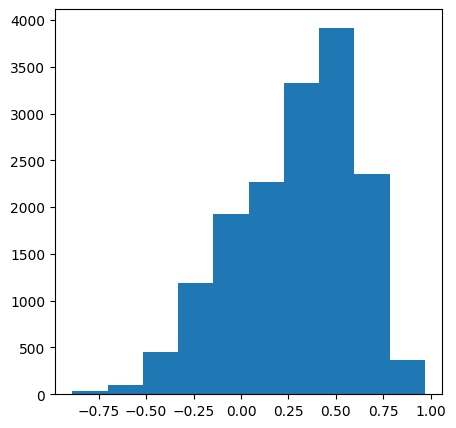

In [ ]:
plt.hist(df['sentiment'])

In [ ]:
#Topics per Description / Unique Topics / Top Topic 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(sentimenttopic_df, columns=['Topic'])
print(df.describe())

        Topic
count   15936
unique   1370
top     dress
freq     1111


In [ ]:
sentimentquery = '''SELECT 
        Description,
        Document,
        Topic,
        COUNT(SIA_COMPOUND + Textblob_Polarity) / 2 as sentiment
        
        
        
        
        FROM review
        
        GROUP BY
        Description'''

In [ ]:
sentimentavg_df = pd.read_sql_query(sentimentquery, connection)
sentimentavg_df.head()

,Description,Document,Topic,sentiment
0,"\n\nlooking at the pictures online, i thought ...",17681,coat,0
1,\r\n\r\nretailer accepted the return with a ha...,8159,retailer,0
2,\r\n\r\nwanted to love this as the style is ve...,7871,style,0
3,"\r\nas the reviewer say, it is very thick wool...",13044,reviewer,0
4,\r\nbought a similar maeve dress last year and...,3979,one,0


In [ ]:
sentimentavgquery = '''SELECT AVG(COUNT)
                FROM
                (SELECT COUNT (*) AS Count
                FROM review

                GROUP BY
                Description
                ) as counts'''

In [ ]:
#AVG sentiment per Description
sentimentdescravg_df = pd.read_sql_query(sentimentavgquery, connection)
sentimentdescravg_df.head()

,AVG(COUNT)
0,1.012173


In [ ]:
sentimentavgquery = '''SELECT AVG(COUNT)
                FROM
                (SELECT COUNT (*) AS Count
                FROM review

                GROUP BY
                Document
                ) as counts'''

In [ ]:
sentimentdocavg_df = pd.read_sql_query(sentimentavgquery, connection)
sentimentdocavg_df.head()

,AVG(COUNT)
0,1.952747
